In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import os

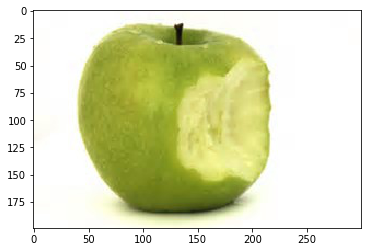

In [2]:
files = os.listdir('apple')

files = [os.path.join('apple', file_i)
         for file_i in os.listdir('apple')
         if '.jpg' in file_i]
img = plt.imread(files[0])

plt.imshow(img)

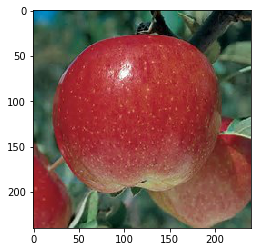

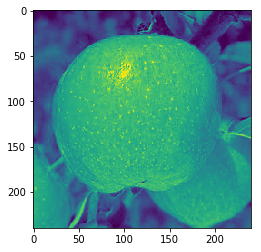

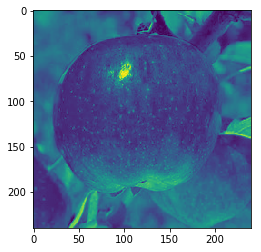

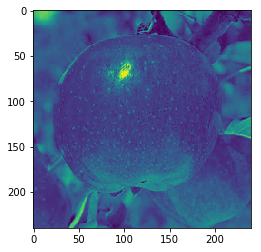

In [3]:
def img_show(img):
    img = plt.imread(img)
    plt.figure()
    plt.imshow(img)
    plt.figure()
    plt.imshow(img[:,:,0])
    plt.figure()
    plt.imshow(img[:,:,1])
    plt.figure()
    plt.imshow(img[:,:,2])

rand = np.random.randint(0,len(files))
img_show(files[rand])

In [4]:
def imcrop_tosquare(img):
    """Make any image a square image.

    Parameters
    ----------
    img : np.ndarray
        Input image to crop, assumed at least 2d.

    Returns
    -------
    crop : np.ndarray
        Cropped image.
    """
    if img.shape[0] > img.shape[1]:
        extra = (img.shape[0] - img.shape[1])
        if extra % 2 == 0:
            crop = img[extra // 2:-extra // 2, :]
        else:
            crop = img[max(0, extra // 2 + 1):min(-1, -(extra // 2)), :]
    elif img.shape[1] > img.shape[0]:
        extra = (img.shape[1] - img.shape[0])
        if extra % 2 == 0:
            crop = img[:, extra // 2:-extra // 2]
        else:
            crop = img[:, max(0, extra // 2 + 1):min(-1, -(extra // 2))]
    else:
        crop = img
    return crop

In [5]:
img_new = plt.imread(files[4])
print (np.shape(img_new))
img_2 = imcrop_tosquare(img_new)
print (np.shape(img_2))

(193, 262, 3)
(193, 193, 3)


In [6]:
from scipy.misc import imresize

In [7]:
imresize?

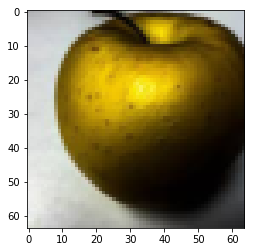

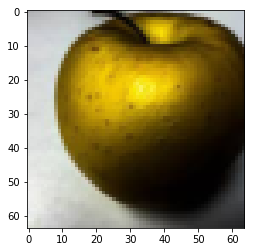

In [8]:
rsz = imresize (img_2, (64,64))
plt.figure()
plt.imshow(rsz)
plt.figure()
plt.imshow(rsz, interpolation='nearest')

(64, 64, 3)
(64, 64)


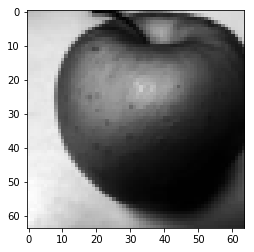

In [9]:
print rsz.shape
mean_img = np.mean(rsz, axis=2)
print(mean_img.shape)
plt.imshow(mean_img, cmap='gray')

In [10]:
imges = []
print (len(files))
for files_i in files:
    img = plt.imread(files_i)
    try:
        if img.shape[2]>3:
            img = img[:,:,:3]
        cropped = imcrop_tosquare(img)
        rsz = imresize(cropped, (54,54))
        imges.append(rsz)
    except:
        cropped = imcrop_tosquare(img)
        rsz = imresize(cropped, (54,54))
        print (rsz.shape)
        imges.append(rsz)
print (len(imges))

302
302


In [11]:
print (imges[4].shape)

(54, 54, 3)


In [12]:
np.shape(imges[0])

(54, 54, 3)

In [13]:
data = np.array(imges)

In [14]:
data.shape

(302, 54, 54, 3)

In [15]:
data = np.concatenate([img_i[np.newaxis] for img_i in imges], axis=0)

In [16]:
data.shape

(302, 54, 54, 3)

In [17]:
plt.style.use("ggplot")

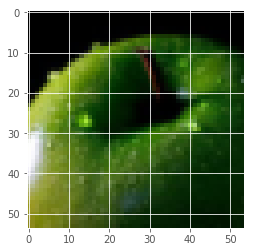

In [18]:
plt.imshow(imges[1])

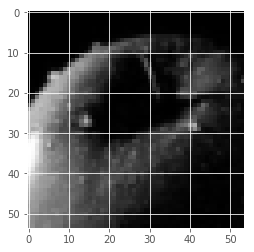

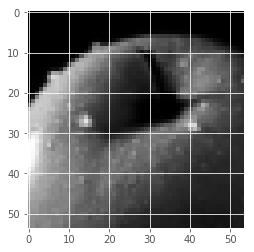

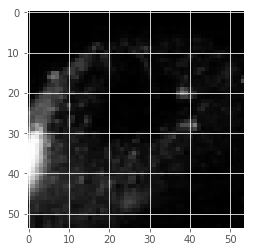

In [19]:
plt.figure()
plt.imshow(data[1,:,:,0], cmap='gray')
plt.figure()
plt.imshow(data[1,:,:,1], cmap='gray')
plt.figure()
plt.imshow(data[1,:,:,2], cmap='gray')

(302, 54, 54, 3)


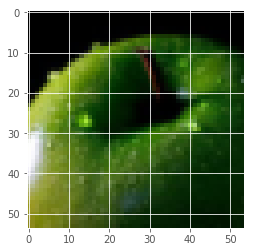

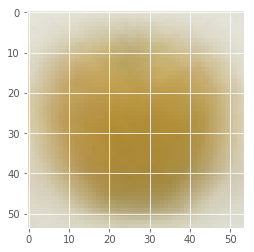

In [20]:
print (data.shape)
plt.imshow(data[1])
mean_img = np.mean(data, axis = 0)
plt.figure()
plt.imshow(mean_img.astype(np.uint8))

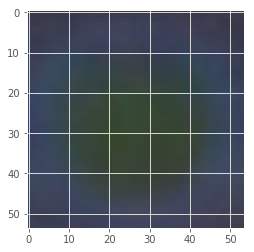

In [21]:
std_img = np.std(data, axis=0)
plt.imshow(std_img.astype(np.uint8))

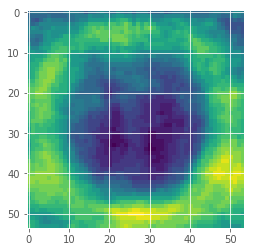

In [22]:
plt.imshow(np.mean(std_img, axis=2).astype(np.uint8))

In [23]:
flattened = data.ravel()
print (flattened)

[255 255 255 ...,   8  63  31]


(array([  4.,   9.,  16.,  12.,  26.,  22.,  24.,  37.,  24.,  23.,  24.,
         23.,  16.,  31.,  12.,  16.,  20.,  23.,  22.,  17.,  20.,  18.,
         20.,  10.,  12.,  15.,  21.,  18.,  17.,  13.,  20.,  16.,   9.,
         17.,  15.,  11.,  14.,  13.,  13.,  16.,  13.,  12.,  11.,   8.,
          8.,  10.,  11.,  13.,  12.,  16.,  12.,  11.,  16.,   7.,  11.,
         16.,  13.,   9.,  10.,   7.,  13.,  15.,  17.,  12.,   8.,   8.,
         14.,   4.,  10.,   9.,   8.,  14.,  13.,   8.,   9.,   9.,   5.,
         12.,  15.,  12.,  11.,   7.,  13.,   3.,  11.,  15.,  10.,   8.,
          7.,  11.,   8.,   8.,   8.,   6.,   8.,  10.,  15.,  11.,   5.,
         16.,   6.,  10.,   6.,  10.,   8.,   9.,  11.,   6.,  11.,   7.,
          4.,   9.,  11.,   4.,   8.,   8.,  11.,  10.,   7.,  14.,  10.,
         18.,  22.,  48.,  57.,  45.,  37.,  43.,  40.,  42.,  52.,  38.,
         38.,  41.,  39.,  37.,  25.,  36.,  39.,  32.,  32.,  36.,  34.,
         27.,  29.,  41.,  38.,  33., 

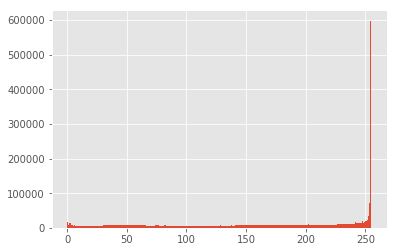

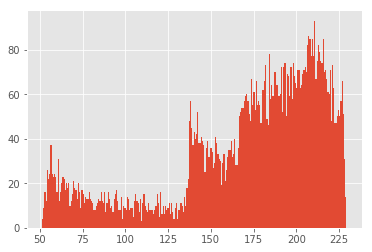

In [24]:
plt.figure()
plt.hist(flattened.ravel(),255)
plt.figure()
plt.hist(mean_img.ravel(),255)

Text(0.5,1,u'(img - mean) distribution')

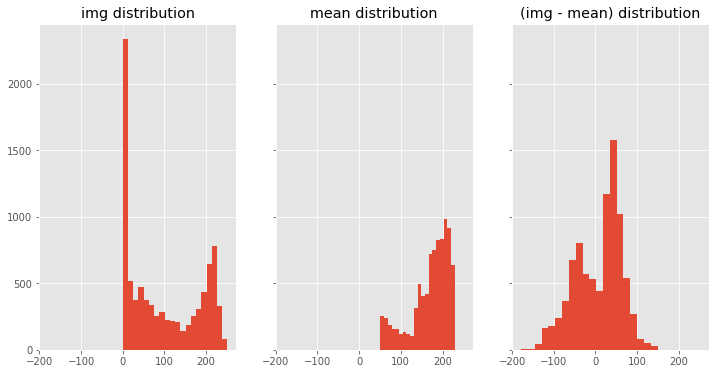

In [25]:
bins = 20
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[4]).ravel(), bins)
axs[0].set_title('img distribution')
axs[1].hist((mean_img).ravel(), bins)
axs[1].set_title('mean distribution')
axs[2].hist((data[0] - mean_img).ravel(), bins)
axs[2].set_title('(img - mean) distribution')

(-5, 5)

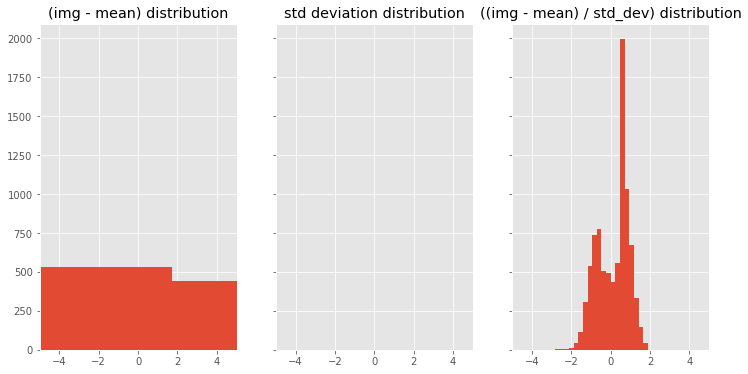

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0] - mean_img).ravel(), bins)
axs[0].set_title('(img - mean) distribution')
axs[1].hist((std_img).ravel(), bins)
axs[1].set_title('std deviation distribution')
axs[2].hist(((data[0] - mean_img) / std_img).ravel(), bins)
axs[2].set_title('((img - mean) / std_dev) distribution')
axs[2].set_xlim([-150, 150])
axs[2].set_xlim([-100, 100])
axs[2].set_xlim([-50, 50])
axs[2].set_xlim([-10, 10])
axs[2].set_xlim([-5, 5])

In [27]:
import tensorflow as tf

x = np.linspace?

In [ ]:
x = np.linspace

In [28]:
x = np.linspace

In [29]:
x = np.linspace(0,10,50)

print (x)

[  0.           0.20408163   0.40816327   0.6122449    0.81632653
   1.02040816   1.2244898    1.42857143   1.63265306   1.83673469
   2.04081633   2.24489796   2.44897959   2.65306122   2.85714286
   3.06122449   3.26530612   3.46938776   3.67346939   3.87755102
   4.08163265   4.28571429   4.48979592   4.69387755   4.89795918
   5.10204082   5.30612245   5.51020408   5.71428571   5.91836735
   6.12244898   6.32653061   6.53061224   6.73469388   6.93877551
   7.14285714   7.34693878   7.55102041   7.75510204   7.95918367
   8.16326531   8.36734694   8.57142857   8.7755102    8.97959184
   9.18367347   9.3877551    9.59183673   9.79591837  10.        ]


In [30]:
print (x.shape)
print (x.dtype)

(50,)
float64


In [31]:
y = tf.linspace(0.,10.,40)
print (y)
# print (y.shape)

Tensor("LinSpace:0", shape=(40,), dtype=float32)


In [32]:
g = tf.get_default_graph()

In [33]:
sess = tf.Session()
computed_X = sess.run(y)
print(computed_X)
sess.close()

[  0.           0.25641027   0.51282054   0.76923084   1.02564108
   1.28205132   1.53846169   1.79487193   2.05128217   2.30769253
   2.56410265   2.82051301   3.07692337   3.33333349   3.58974385
   3.84615397   4.10256433   4.35897446   4.61538506   4.87179518
   5.1282053    5.3846159    5.64102602   5.89743614   6.15384674
   6.41025686   6.66666698   6.92307711   7.17948771   7.43589783
   7.69230795   7.94871855   8.20512867   8.46153927   8.71794891
   8.97435951   9.23077011   9.48717976   9.74359035  10.00000095]


In [34]:
g = tf.Graph()

In [35]:
sess = tf.InteractiveSession()

In [36]:
y.eval()

array([  0.        ,   0.25641027,   0.51282054,   0.76923084,
         1.02564108,   1.28205132,   1.53846169,   1.79487193,
         2.05128217,   2.30769253,   2.56410265,   2.82051301,
         3.07692337,   3.33333349,   3.58974385,   3.84615397,
         4.10256433,   4.35897446,   4.61538506,   4.87179518,
         5.1282053 ,   5.3846159 ,   5.64102602,   5.89743614,
         6.15384674,   6.41025686,   6.66666698,   6.92307711,
         7.17948771,   7.43589783,   7.69230795,   7.94871855,
         8.20512867,   8.46153927,   8.71794891,   8.97435951,
         9.23077011,   9.48717976,   9.74359035,  10.00000095], dtype=float32)

In [37]:
print (y.get_shape().as_list())

[40]


In [38]:
mean = 5
sigma = 1.

z = (tf.exp(tf.negative(tf.pow(y - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

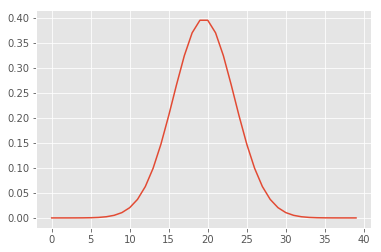

In [39]:
res = z.eval()
plt.plot(res)

40


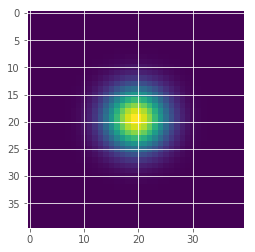

In [40]:
# Let's store the number of values in our Gaussian curve.
ksize = z.get_shape().as_list()[0]

print (ksize)

# Let's multiply the two to get a 2d gaussian
z_2d = tf.matmul(tf.reshape(z, [ksize, 1]), tf.reshape(z, [1, ksize]))

# Execute the graph
plt.imshow(z_2d.eval())

In [41]:
from skimage import data

img = data.camera().astype(np.float32)

(512, 512)


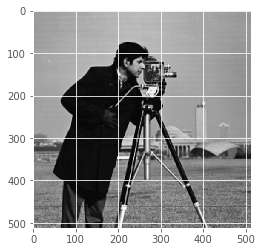

In [42]:
plt.imshow(img, cmap='gray')
print img.shape

In [43]:
img_4d = tf.reshape(img,(1,img.shape[0], img.shape[1],1))
print (img_4d)

Tensor("Reshape_2:0", shape=(1, 512, 512, 1), dtype=float32)


In [44]:
z_4d = tf.reshape(z_2d, [ksize,ksize,1,1])
print (z_4d.get_shape())

(40, 40, 1, 1)


In [45]:
convolvoed = tf.nn.conv2d(img_4d,z_4d,strides=[1,1,1,1],padding='SAME')
res = convolvoed.eval()
print res.shape

(1, 512, 512, 1)


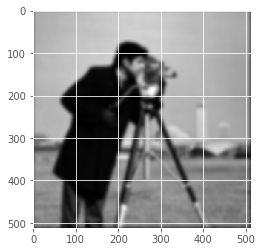

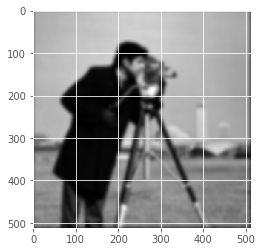

In [46]:
plt.imshow(np.squeeze(res), cmap='gray')

plt.figure()


plt.imshow(res[0, :, :, 0], cmap='gray')

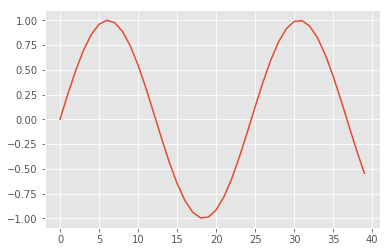

In [47]:
xs = tf.linspace(0.,10.,ksize)
ys = tf.sin(xs)
plt.figure()
plt.plot(ys.eval())

In [48]:
ys = tf.reshape(ys,[ksize,1])

In [49]:
ones = tf.ones((1,ksize))

In [50]:
wave = tf.matmul(ys,ones)

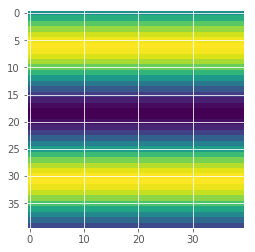

In [51]:
plt.imshow(wave.eval())

In [52]:
gabor = tf.matmul(z_2d,wave)

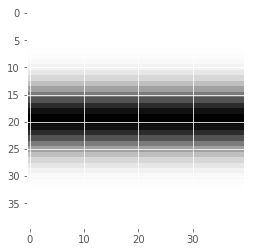

In [53]:
plt.imshow(gabor.eval(),cmap='gray')

In [54]:
img = tf.placeholder(tf.float32, shape=[None,None], name='img')
img_3 = tf.expand_dims(img,2)
dims = img_3.get_shape()
print (dims)

(?, ?, 1)


In [55]:
img_4 = tf.expand_dims(img_3,0)
mean = tf.placeholder(tf.float32, name = 'mean')
sigma = tf.placeholder(tf.float32, name = 'sigma')
ksize = tf.placeholder(tf.int32, name = 'ksize')


x = tf.linspace(0.,10.,ksize)
z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
      (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

z_2d = tf.matmul(tf.reshape(z, tf.stack([ksize,1])),
                 tf.reshape(z, tf.stack([1,ksize])))
ys = tf.sin(x)
ys = tf.reshape(ys, tf.stack([ksize,1]))

ones = tf.ones(tf.stack([1,ksize]))
wave = tf.matmul(ys, ones)
gabor = tf.multiply(wave, z_2d)

gabor_4d = tf.reshape(gabor, tf.stack([ksize,ksize,1,1]))

convolved = tf.nn.conv2d(img_4d, gabor_4d, strides=[1, 1, 1, 1], padding='SAME', name='convolved')
convolved_img = convolved[0, :, :, 0]



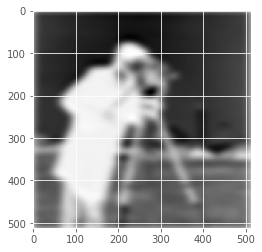

In [56]:
res = convolved_img.eval(feed_dict={
    img: data.camera(), mean:5.0, sigma:1.0, ksize:100})
plt.imshow(res, cmap='gray')

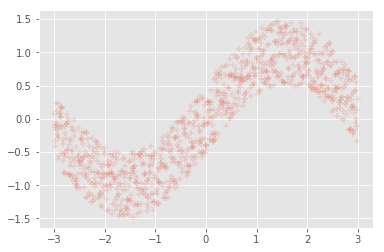

In [57]:
n_observations = 1000

# Instead of having an image as our input, we're going to have values from -3 to 3.  This is going to be the input to our network.
xs = np.linspace(-3, 3, n_observations)

# From this input, we're going to teach our network to represent a function that looks like a sine wave.  To make it difficult, we are going to create a noisy representation of a sine wave by adding uniform noise.  So our true representation is a sine wave, but we are going to make it difficult by adding some noise to the function, and try to have our algorithm discover the underlying cause of the data, which is the sine wave without any noise.
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys, alpha=0.15, marker='+')
X = tf.placeholder(tf.float32, name = 'X')
Y = tf.placeholder(tf.float32, name = 'Y')

(array([   7.,   33.,   83.,  186.,  253.,  230.,  136.,   48.,   20.,    4.]),
 array([-3.15463829, -2.50056834, -1.84649839, -1.19242845, -0.5383585 ,
         0.11571145,  0.7697814 ,  1.42385135,  2.0779213 ,  2.73199124,
         3.38606119]),
 <a list of 10 Patch objects>)

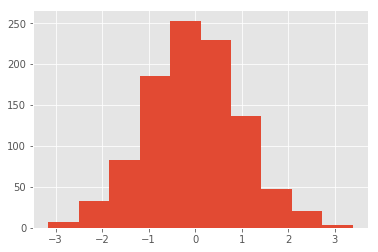

In [58]:
sess = tf.InteractiveSession()
n = tf.random_normal([1000]).eval()
plt.hist(n)

(array([   6.,   21.,   59.,  150.,  250.,  242.,  177.,   64.,   26.,    5.]),
 array([-0.3374587 , -0.27059307, -0.20372744, -0.1368618 , -0.06999617,
        -0.00313054,  0.06373509,  0.13060072,  0.19746636,  0.26433199,
         0.33119762]),
 <a list of 10 Patch objects>)

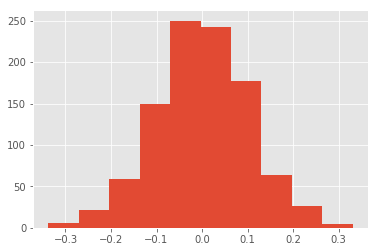

In [59]:
n = tf.random_normal([1000], stddev=0.1).eval()
plt.hist(n)

In [60]:
W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='weight')
B = tf.Variable(tf.constant([0], dtype=tf.float32), name = 'bias')
Y_pred = X*W+B

In [61]:
def dis(p1, p2):
    return tf.abs(p1 - p2)

In [62]:
cost = dis(Y_pred, Y)

In [63]:
cost = tf.reduce_mean(dis(Y_pred, Y))

In [65]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [66]:
def train(X, Y, Y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    cost = tf.reduce_mean(dis(Y_pred, Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    fig, ax = plt.subplots(1, 1)
    ax.scatter(xs, ys, alpha=0.15, marker='+')
    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 2])
    with tf.Session() as sess:
        # Here we tell tensorflow that we want to initialize all
        # the variables in the graph so we can use them
        # This will set W and b to their initial random normal value.
        sess.run(tf.global_variables_initializer())

        # We now run a loop over epochs
        prev_training_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

            training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

            if it_i % 10 == 0:
                ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
                ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
                print(training_cost)
    fig.show()
    plt.draw()

2.0836
3.12829
3.55039
1.38712
2.26431
3.09519
3.16098
2.54323
2.91582
1.82359


/Library/Python/2.7/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


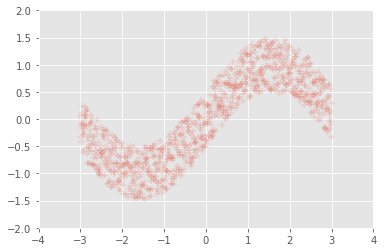

In [67]:
# We're going to multiply our input by 100 values, creating an "inner layer"
# of 100 neurons.
n_neurons = 100
W = tf.Variable(tf.random_normal([1, n_neurons], stddev=0.1))

# and allow for n_neurons additions on each of those neurons
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]))

# Instead of multiplying directly, we use tf.matmul to perform a
# matrix multiplication
h = tf.matmul(tf.expand_dims(X, 1), W) + b

# Create the operation to add every neuron's output
Y_pred = tf.reduce_sum(h, 1)

# Retrain with our new Y_pred
train(X, Y, Y_pred)

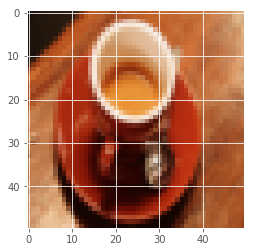

In [75]:
from skimage.data import *
from scipy.misc import imresize
img = imresize(coffee(), (50,50))
plt.imshow(img)

In [87]:
xs = []
ys = []

for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        xs.append([row_i, col_i])
        ys.append(img[row_i,col_i])

ys = np.array(ys)
xs = np.array(xs)

xs = (xs - np.mean(xs))/np.std(xs)
print xs.shape, ys.shape

(2500, 2) (2500, 3)


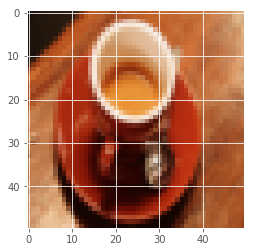

In [88]:
plt.imshow(ys.reshape(img.shape))

In [92]:
X = tf.placeholder(tf.float32,shape=[None, 2], name = 'X')
Y = tf.placeholder(tf.float32,shape=[None, 3], name = "Y")

def linear(X, n_input, n_output, activation=None):
    W = tf.Variable(tf.random_normal([n_input, n_output], stddev=0.1), name='W')
    b = tf.Variable(
        tf.constant(0, dtype=tf.float32, shape=[n_output]), name='b')
    h = tf.nn.tanh(tf.matmul(X, W) + b, name='h')
    return h


n_neurons = [2,50,50,50,50,50,50,3]

current_input = X
for layer_i in range(1, len(n_neurons)):
    current_input = linear(
        X=current_input,
        n_input=n_neurons[layer_i - 1],
        n_output=n_neurons[layer_i],
        activation=tf.nn.relu if (layer_i+1) < len(n_neurons) else None,
        scope='layer_' + str(layer_i))
Y_pred = current_input

TypeError: linear() got an unexpected keyword argument 'scope'